In [2]:
#Imports necessários

import pandas as pd 
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

plt.style.use("seaborn-v0_8")
#Estilo

sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (17,8)


[*********************100%***********************]  1 of 1 completed


Price           Close       High        Low       Open    Volume
Ticker          ^GSPC      ^GSPC      ^GSPC      ^GSPC     ^GSPC
Date                                                            
1970-01-02  93.000000  93.540001  91.790001  92.059998   8050000
1970-01-05  93.459999  94.250000  92.529999  93.000000  11490000
1970-01-06  92.820000  93.809998  92.129997  93.459999  11460000
1970-01-07  92.629997  93.379997  91.930000  92.820000  10010000
1970-01-08  92.680000  93.470001  91.989998  92.629997  10670000
1970-01-09  92.400002  93.250000  91.820000  92.680000   9380000
1970-01-12  91.699997  92.669998  91.199997  92.400002   8900000
1970-01-13  91.919998  92.610001  90.989998  91.699997   9870000
1970-01-14  91.650002  92.400002  90.879997  91.919998  10380000
1970-01-15  91.680000  92.349998  90.730003  91.650002  11120000
1970-01-16  90.919998  92.489998  90.360001  91.680000  11940000
1970-01-19  89.650002  90.720001  89.139999  90.720001   9500000
1970-01-20  89.830002  90

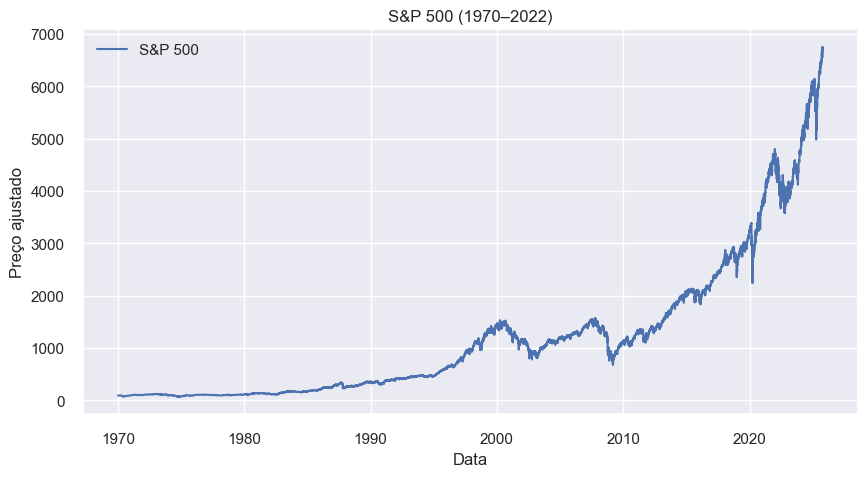

In [3]:
#Importando dados do SP&500 de 1970 até 2025
sp = yf.download("^GSPC", start="1970-01-01", end="2025-10-12", auto_adjust=True)

#Verificando o DataFrame Multiindex
print(sp.head(15))
print(sp.columns)

#Tirando valores inconsistentes
sp = sp["Close"].dropna()

#Plotando o gráfico da série histórica
plt.figure(figsize=(10,5))
plt.plot(sp, label="S&P 500")
plt.title("S&P 500 (1970–2022)")
plt.xlabel("Data")
plt.ylabel("Preço ajustado")
plt.legend()
plt.show()




[*********************100%***********************]  1 of 1 completed

Ticker           ^GSPC
Date                  
1990-01-02  359.690002
1990-01-03  358.760010
1990-01-04  355.670013
1990-01-05  352.200012
1990-01-08  353.790009
1990-01-09  349.619995
1990-01-10  347.309998
1990-01-11  348.529999
1990-01-12  339.929993
1990-01-15  337.000000
1990-01-16  340.750000
1990-01-17  337.399994
1990-01-18  338.190002
1990-01-19  339.149994
1990-01-22  330.380005
Index(['^GSPC'], dtype='object', name='Ticker')


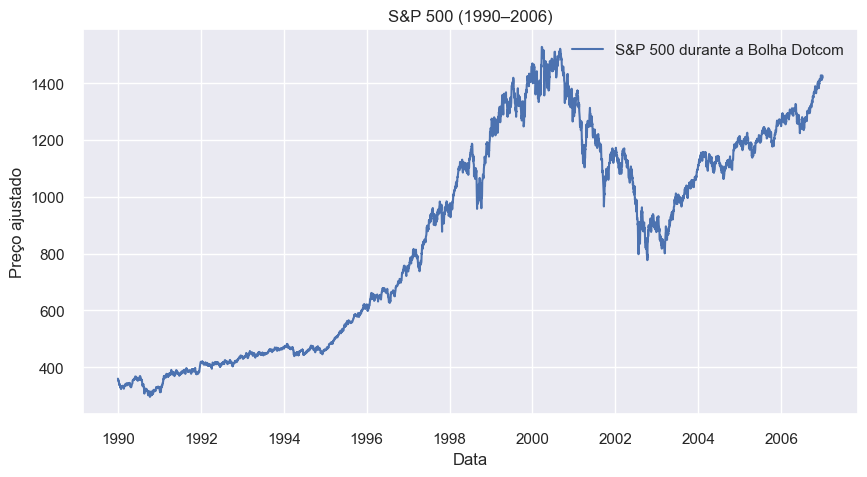

In [4]:
#Importando os dados do periodo de 1990 até 2006, a literatura economica indica que a bolha começou em meados dos anos 90 e foi até 2004
#Assim, pegamos esses dados para verificar o movimento que as pessoas viram na época.
sp = yf.download("^GSPC", start="1990-01-01", end="2006-12-31", auto_adjust=True)

#Retirando dados inconsistentes.
sp = sp["Close"].dropna()
print(sp.head(15))
print(sp.columns)


#Plotando a série.
plt.figure(figsize=(10,5))
plt.plot(sp, label="S&P 500 durante a Bolha Dotcom")
plt.title("S&P 500 (1990–2006)")
plt.xlabel("Data")
plt.ylabel("Preço ajustado")
plt.legend()
plt.show()

Baixando: XLF
Baixando: XLE
Baixando: XLV
Baixando: XLY
Baixando: XLK


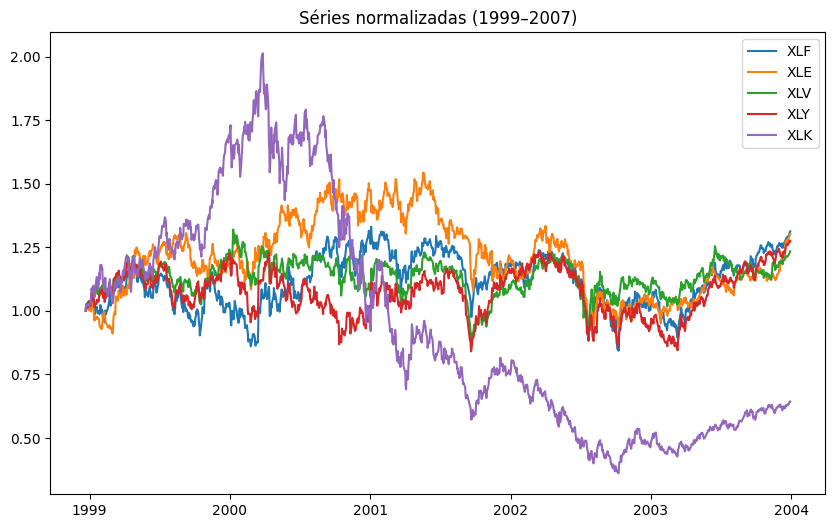

In [2]:
#Importando novamente(o Kernel tinha caido)
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
#Para uma primeira mostragem da relação gráfica de contágio, era mais correto utilizar os Indices Setorias e não apenas, as empresas dos setores como Proxys
#Para calcular as covariancias e as correlações, ai sim, utilizaremos as empresas.
tickers = ["XLF", "XLE", "XLV",'XLY','XLK']
start = "1990-01-01"
end = "2003-12-31"
#XLF=Setor Financeiro
#XLE=Energia
#XLV=Saúde
#XLY=Consumo(discricionário)
#XLK=Tecnologia(emgloba CISCO e as outras empresas da época, como EBAY, QCOM e outras , que também participaram da euforia,
#Infelizmente, essas empresas não tinham capital na bolsa até 1998 e 1999, se eu ajusta-se o periodo de tempo, perderia a clareza na evolução bolha,
#e o argumento de que bolhas não se formam do dia pra noite, mas sim uma crença viril da capacidade de fluxo de caixa da empresa, muitas vezes de forma iracional.

#Criando o DataFrame com os Indices
prices = pd.DataFrame()
#Função que para cada indice baixa a sua serie historica do periodo.
for t in tickers:
    print("Baixando:", t)
    df = yf.download(t, start=start, end=end, auto_adjust=True, progress=False)

    # pega só a coluna Close
    close = df["Close"]

    # adiciona ao dataframe final
    prices[t] = close

# limpeza mínima(chatooooo)
prices = prices.ffill().dropna(how="all")

# gráfico normalizado
normalized = prices / prices.iloc[0]
#Plotando o gráfico
plt.figure(figsize=(10,6))
plt.plot(normalized)
plt.title("Séries normalizadas (1999–2007)")
plt.legend(normalized.columns)
plt.show()


Baixando: XLF
Baixando: XLE
Baixando: XLV
Baixando: XLY
Baixando: XLK


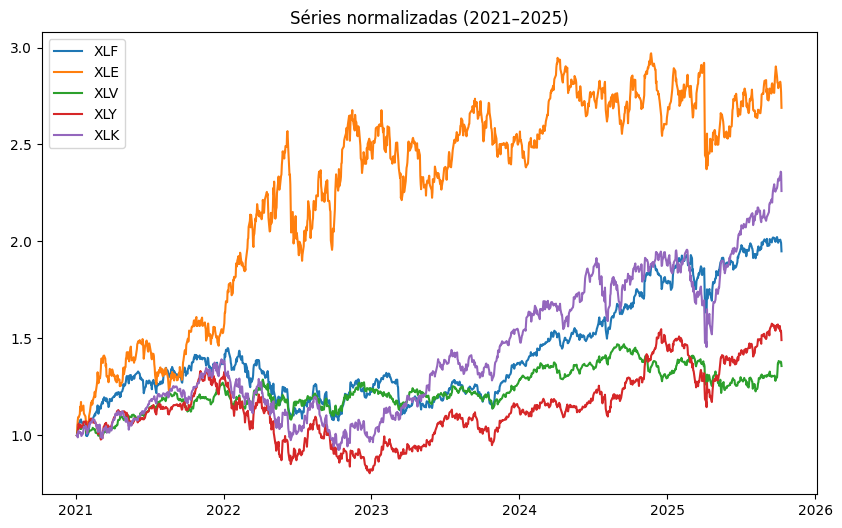

In [1]:
#Importando novamente essa m****
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
#Escolhendo os mesmos indices setorias de antes, mas ajustando para a nossa suposta bolha da IA
#Queremos verificar se encontramos um movimento parecido.
#Ajustei para 2021, por que a bolha só faz sentido pós lançamento do ChatGPT em 2022
tickers = ["XLF", "XLE", "XLV",'XLY','XLK']
start = "2021-01-01"
end = "2025-10-12"

#Criando o datafram
prices = pd.DataFrame()

#Para cada indice baixando sua serie historica
for t in tickers:
    print("Baixando:", t)
    df = yf.download(t, start=start, end=end, auto_adjust=True, progress=False)

    # pega só a coluna Close
    close = df["Close"]

    # adiciona ao dataframe final
    prices[t] = close

# limpeza mínima
prices = prices.ffill().dropna(how="all")

# gráfico normalizado
normalized = prices / prices.iloc[0]

#Plotando
plt.figure(figsize=(10,6))
plt.plot(normalized)
plt.title("Séries normalizadas (2021–2025)")
plt.legend(normalized.columns)
plt.show()

#Viu que legal? não teve o mesmo grafico que esperavamos, um XLK esticadasso igual em 2000, mas é possivel ver um
#descolamento se formando...
#Por que caralhos XLE explodiu tanto? Petroleo? Vou investigar...


Baixando: CSCO
Baixando: MSFT
Baixando: ORCL


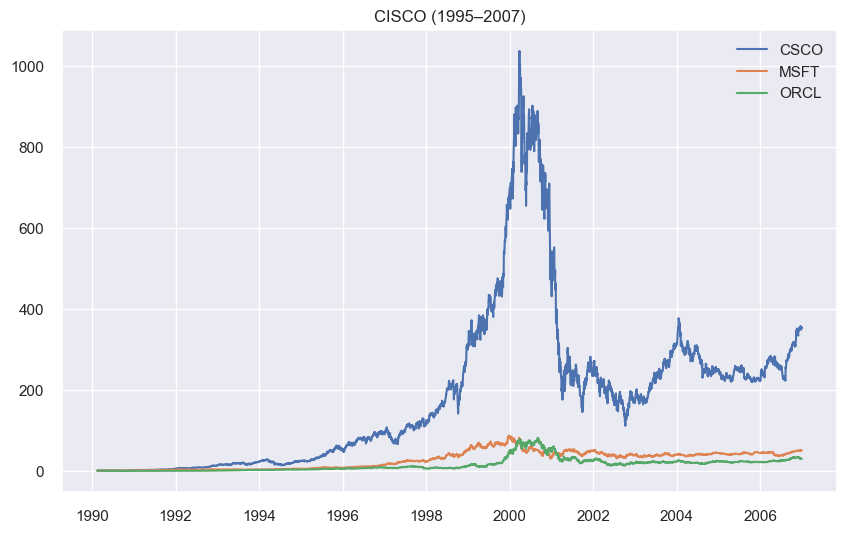

In [7]:
#Importando
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
#Agora vamos para as empresas, CSCO, MSFT e OCRL, as outras QCOM, EBAY não tinham as series em 1990, uma pena, 
#mas já da pra ver um resultado legal
tickers = ["CSCO",'MSFT','ORCL']
start = "1990-01-01"
end = "2006-12-31"

#Criando dataframe
prices = pd.DataFrame()

#Para cada empresa, baixando seus preços historicos ajustados
for t in tickers:
    print("Baixando:", t)
    df = yf.download(t, start=start, end=end, auto_adjust=True, progress=False)

    # pega só a coluna Close
    close = df["Close"]

    # adiciona ao dataframe final
    prices[t] = close

# limpeza mínima
prices = prices.ffill().dropna(how="all")

# gráfico normalizado
normalized = prices / prices.iloc[0]

#Plotando grafico
plt.figure(figsize=(10,6))
plt.plot(normalized)
plt.title("CISCO (1995–2007)")
plt.legend(normalized.columns)
plt.show()


Baixando: NVDA
Baixando: AAPL
Baixando: MSFT
Baixando: ORCL
Baixando: PLTR
Baixando: IBM
Baixando: AVGO


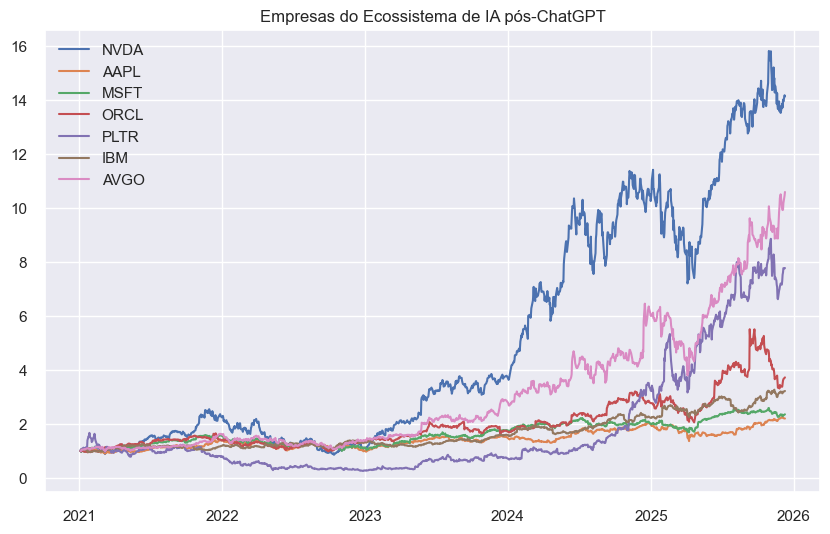

In [8]:
#Importando de novo
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
#Mesma coisa, porém selecionei algumas empresas diferentes que fazem parte do ecossistema da IA
#Isso facilita ver que é um movimento conjunto de um novo subsetor dentro do setor de tecnologia, o que dificulta a analise de bolha
#Afinal, os lucros dessas empresas juntas é colossal, em 2024, a NVIDIA teve lucro liquido de U$60Bilhões com crescimento de 126% em relação a 2023.
#Ai a gnt se pergunta, será que elas não valem de fato aquilo que estão sendo negociadas?
tickers = ["NVDA",'AAPL','MSFT','ORCL','PLTR','IBM','AVGO']
start = "2021-01-01"
end = "2025-12-10"

#criando dataframe
prices = pd.DataFrame()
#Para cada empresa, baixando seus preços historicos ajustados
for t in tickers:
    print("Baixando:", t)
    df = yf.download(t, start=start, end=end, auto_adjust=True, progress=False)

    # pega só a coluna Close
    close = df["Close"]

    # adiciona ao dataframe final
    prices[t] = close

# limpeza mínima
prices = prices.ffill().dropna(how="all")

# gráfico normalizado
normalized = prices / prices.iloc[0]
#Plotando o grafico
plt.figure(figsize=(10,6))
plt.plot(normalized)
plt.title("Empresas do Ecossistema de IA pós-ChatGPT")
plt.legend(normalized.columns)
plt.show()


Tipo csco: <class 'pandas.core.series.Series'>
csco head:
Date
1995-01-03    1.233265
1995-01-04    1.242301
1995-01-05    1.233265
1995-01-06    1.233265
1995-01-09    1.260370
Name: (Close, CSCO), dtype: float64

Tipo market: <class 'pandas.core.series.Series'>
market head:
Date
1995-01-03    459.109985
1995-01-04    460.709991
1995-01-05    460.339996
1995-01-06    460.679993
1995-01-09    460.829987
Name: (Close, ^GSPC), dtype: float64

Pico (csco idxmax): 2000-03-27 00:00:00 -> 2000-03-27

Retorno acumulado CSCO desde 1995-01-03 até 2000-03-27: 4123.08%
Retorno acumulado ^GSPC desde 1995-01-03 até 2000-03-27: 231.92%


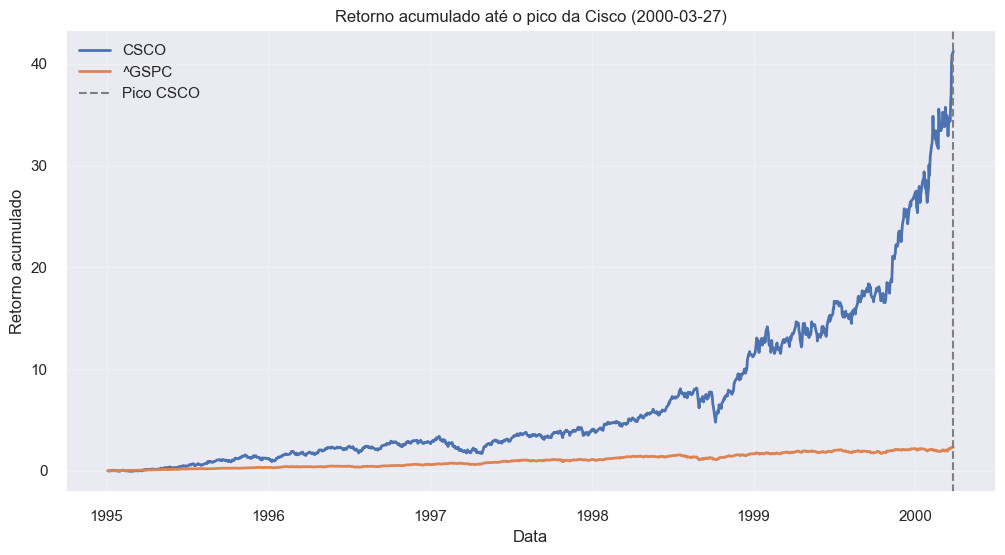

In [9]:
#Aqui começa a parte mais chata, calculo do retorno acumulado até o topo da bolha dotcom.
# Este código baixa os dados, garante o formato correto, encontra a data do pico,
# alinha a data do mercado e calcula o retorno acumulado até essa data.
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Função que sempre retorna uma Series com preços de fechamento.
# Isso é para evitar erros posteriores (como idxmax retornar Series, colunas faltando e tals).

def get_close_series(ticker, start, end):
    """
    Baixa preços e retorna UMA pandas.Series com preços de fechamento ajustados (ou close).
    Funciona para DataFrame simples, MultiIndex e Series.
    """
    df = yf.download(ticker, start=start, end=end, auto_adjust=True, progress=False)
    
    # Verifica se os dados vieram vazios — evita trabalhar com objetos inválidos
    if df is None or (isinstance(df, (pd.DataFrame, pd.Series)) and df.empty):
        raise ValueError(f"Sem dados para {ticker} no período {start} - {end}")

    # Caso 1 — df é Series (raro), já está no formato desejado.
    if isinstance(df, pd.Series):
        s = df.dropna()
        # se for uma série com índice de colunas (improvável) retorna direto
        return s

    # Caso 2 — df é DataFrame (o normal).
    # Esse bloco lida com DataFrames simples e MultiIndex.
    if isinstance(df, pd.DataFrame):
        # 1) MultiIndex (colunas tuple):  Caso 2 — df é DataFrame (o normal).
        # Devemos localizar a subcoluna 'Close' ou 'Adj Close'.
        if isinstance(df.columns, pd.MultiIndex):
            # normalizar níveis para checar
            matches = [col for col in df.columns if len(col) > 1 and str(col[1]).strip().lower() in ("close", "adj close", "adjclose")]
            if matches:
                s = df[matches[0]]
                # se por algum CARALHO de motivo ainda for DataFrame, pega a primeira coluna
                if isinstance(s, pd.DataFrame):
                    s = s.iloc[:, 0]
                return s.dropna()
            # Procuramos qualquer coluna cujo segundo nível seja 'Close'
            for col in df.columns:
                if str(col[1]).strip().lower() in ("close", "adj close", "adjclose"):
                    s = df[col]
                    if isinstance(s, pd.DataFrame):
                        s = s.iloc[:,0]
                    return s.dropna()
             # Último fallback: pega a primeira subcoluna disponível
            first_col = df.columns[0]
            s = df[first_col]
            if isinstance(s, pd.DataFrame):
                s = s.iloc[:, 0]
            return s.dropna()

        # 2) DataFrame normal (colunas planas)
        # Procuramos 'Close', depois 'Adj Close'. Senão usamos a primeira coluna.
        if "Close" in df.columns:
            return df["Close"].dropna()
        if "Adj Close" in df.columns:
            return df["Adj Close"].dropna()
        # fallback: primeira coluna
        return df.iloc[:, 0].dropna()

    # se chegou aqui, tentar converter pra Series(que inferno)
    return pd.Series(df).dropna()


#Parâmetros
#Vamo calcular o retorno da SP500 e da CSCO no periodo e ver o quão descolado, estava os retornos.
ticker_stock = "CSCO"
ticker_market = "^GSPC"
start = "1995-01-01"
end = "2006-12-31"

# Baixar séries que criamos pela função
csco = get_close_series(ticker_stock, start, end)
market = get_close_series(ticker_market, start, end)

# diagnóstico curto (pra ver se não deu merda na função de transformar dataframe em series)
print("Tipo csco:", type(csco))
print("csco head:")
print(csco.head())
print("\nTipo market:", type(market))
print("market head:")
print(market.head())

# Encontrar pico da Cisco (máxima) 
peak_date = csco.idxmax()
# garantir Timestamp scalar
peak_date = pd.to_datetime(peak_date)
print("\nPico (csco idxmax):", peak_date, "->", peak_date.date())

# Ajustar data do mercado (pregão anterior igual), apenas para verificar se está tudo certo com as datas do pregão no dia da máxima 
if peak_date in market.index:
    market_date = peak_date
else:
    pos = market.index.get_indexer([peak_date], method='ffill')[0]
    if pos == -1:
        # usar primeira data disponível no market
        market_date = market.index[0]
        print("Aviso: mercado não tem pregão anterior ao pico; usando primeira data do mercado:", market_date.date())
    else:
        market_date = market.index[pos]
        if market_date != peak_date:
            print("Mercado não tinha pregão exatamente no pico; usando pregão anterior:", market_date.date())

#  Calcular retorno acumulado (desde primeiro preço disponível de cada série)
cisco_start = csco.iloc[0]
market_start = market.iloc[0]

# Preços no pico
cisco_price_at_peak = csco.loc[peak_date]     
market_price_at_peak = market.loc[market_date]

# Fórmula: retorno = (preço_final / preço_inicial) - 1
cisco_ret = (cisco_price_at_peak / cisco_start) - 1
market_ret = (market_price_at_peak / market_start) - 1

print(f"\nRetorno acumulado CSCO desde {csco.index[0].date()} até {peak_date.date()}: {cisco_ret:.2%}")
print(f"Retorno acumulado {ticker_market} desde {market.index[0].date()} até {market_date.date()}: {market_ret:.2%}")

#Plot retorno acumulado até o pico 

# Calculamos retornos diários (pct_change)
returns_csco = csco.pct_change().dropna()
returns_market = market.pct_change().dropna()


# Convertendo para retorno acumulado: (1+r).cumprod() - 1
cum_csco = (1 + returns_csco).cumprod() - 1
cum_market = (1 + returns_market).cumprod() - 1

# Só plotamos até o menor limite entre as séries
end_plot = min(peak_date, market_date)

# Gráfico
plt.figure(figsize=(12,6))
plt.plot(cum_csco.loc[:end_plot].index, cum_csco.loc[:end_plot].values, label="CSCO", linewidth=2)
plt.plot(cum_market.loc[:end_plot].index, cum_market.loc[:end_plot].values, label=ticker_market, linewidth=2)
# Linha vertical no pico da Cisco
plt.axvline(peak_date, color='grey', linestyle='--', label='Pico CSCO')
plt.title(f"Retorno acumulado até o pico da Cisco ({peak_date.date()})")
plt.ylabel("Retorno acumulado")
plt.xlabel("Data")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


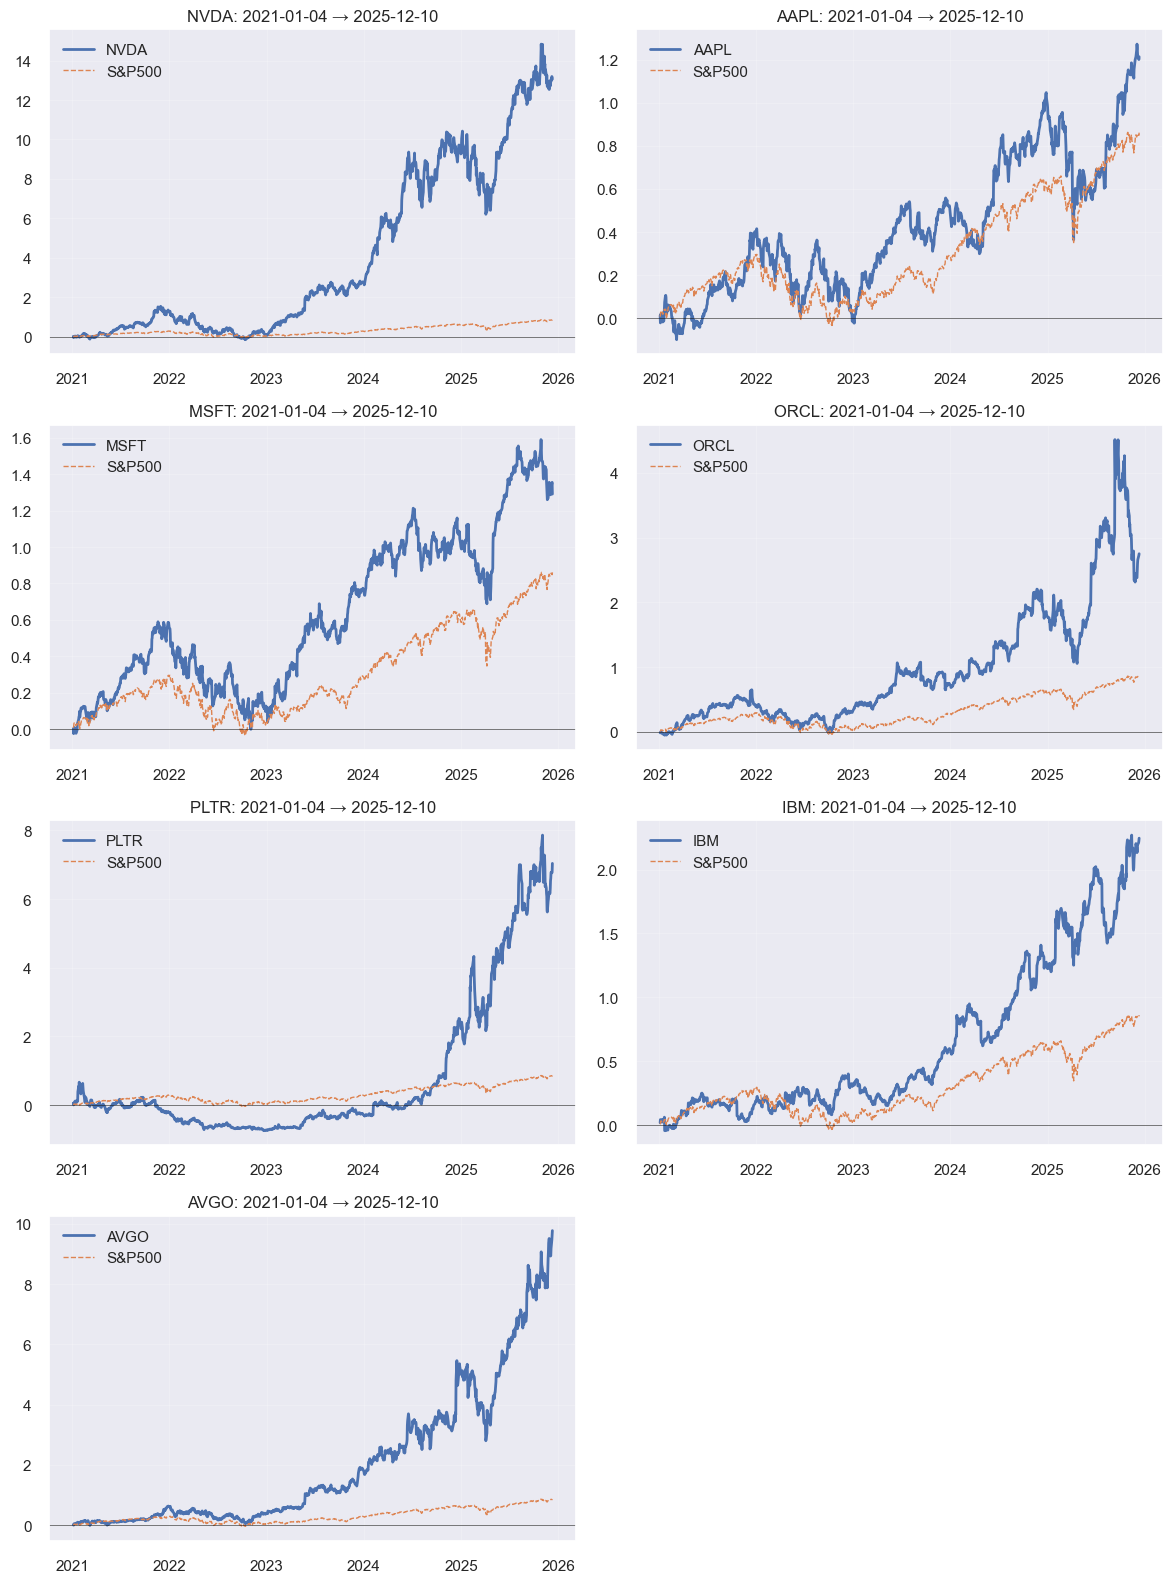

,Ticker,Stock_start,Stock_end,Stock_return_%,Market_start_for_stock,Market_end_for_stock,Market_return_%
0,NVDA,2021-01-04,2025-12-10,1305.40%,2021-01-04,2025-12-10,86.09%
1,AAPL,2021-01-04,2025-12-10,121.30%,2021-01-04,2025-12-10,86.09%
2,MSFT,2021-01-04,2025-12-10,129.11%,2021-01-04,2025-12-10,86.09%
3,ORCL,2021-01-04,2025-12-10,275.04%,2021-01-04,2025-12-10,86.09%
4,PLTR,2021-01-04,2025-12-10,704.07%,2021-01-04,2025-12-10,86.09%
5,IBM,2021-01-04,2025-12-10,224.56%,2021-01-04,2025-12-10,86.09%
6,AVGO,2021-01-04,2025-12-10,977.51%,2021-01-04,2025-12-10,86.09%


In [10]:
#retorno acumulado das empresas do "boom de IA" vs S&P500
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import math

# função para sempre retornar uma pandas.Series, é a mesma função de antes, sem estresse.
def get_close_series(ticker, start, end):
    df = yf.download(ticker, start=start, end=end, auto_adjust=True, progress=False)
    if df is None or (hasattr(df, "empty") and df.empty):
        raise ValueError(f"Sem dados para {ticker} no período {start} - {end}")
    if isinstance(df, pd.Series):
        return df.dropna()
    if isinstance(df, pd.DataFrame):
        # MultiIndex: procurar subcoluna Close/Adj Close
        if isinstance(df.columns, pd.MultiIndex):
            matches = [col for col in df.columns if len(col) > 1 and str(col[1]).strip().lower() in ("close", "adj close", "adjclose")]
            if matches:
                s = df[matches[0]]
                if isinstance(s, pd.DataFrame):
                    s = s.iloc[:,0]
                return s.dropna()
            # fallback: primeira subcoluna
            s = df[df.columns[0]]
            if isinstance(s, pd.DataFrame):
                s = s.iloc[:,0]
            return s.dropna()
        # DataFrame simples
        if "Close" in df.columns:
            return df["Close"].dropna()
        if "Adj Close" in df.columns:
            return df["Adj Close"].dropna()
        # fallback: primeira coluna
        return df.iloc[:,0].dropna()
    # fallback final
    return pd.Series(df).dropna()

# parâmetros
tickers = ["NVDA","AAPL","MSFT","ORCL","PLTR","IBM","AVGO"]
market_ticker = "^GSPC"
start = "2021-01-01"   
end = None             # None = até a última data disponível(curiosamente, HOJE)

# baixar série do mercado(SP&500) usando a função demoniaca, no caso vai funcionar como Benchmark
market = get_close_series(market_ticker, start, end)

results = []

# preparar figura de subplots (n linhas conforme número de tickers, que no caso são 7)
n = len(tickers)
cols = 2
rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(12, 4*rows), squeeze=False)
axes_flat = axes.flatten()

#Loop Principal: para cada ticker
for i, t in enumerate(tickers):
    ax = axes_flat[i]  # eixo correspondente ao subplot
    try:
        #Baixando a série da ação (sempre retorna Series)
        s = get_close_series(t, start, end)
    except Exception as e:
        # Se ocorrer erro no download, imprimir o aviso
        print(f"Erro ao baixar {t}: {e}")
        continue

    # intervalo da empresa
    s_start = s.index[0]
    s_end = s.index[-1]

    # localizar preços do mercado para o mesmo intervalo (usar pregões anteriores se necessário)
    # posição inicial do mercado (<= s_start)
    pos_start = market.index.get_indexer([s_start], method='ffill')[0]
    if pos_start == -1:
        # se não existir pregão anterior, usar o primeiro do market
        pos_start = 0
    market_start_date = market.index[pos_start]

    # posição final do mercado (<= s_end)
    pos_end = market.index.get_indexer([s_end], method='ffill')[0]
    if pos_end == -1:
        pos_end = len(market) - 1
    market_end_date = market.index[pos_end]

    #Preços iniciais e finais para cálculo do retorno acumulado
    stock_start_price = s.iloc[0]
    stock_end_price = s.iloc[-1]
    market_start_price = market.iloc[pos_start]
    market_end_price = market.iloc[pos_end]

    #Cálculo do retorno acumulado simples: (P_end / P_start) - 1
    stock_ret = (stock_end_price / stock_start_price) - 1
    market_ret = (market_end_price / market_start_price) - 1


     #Armazenar os resultados numa tabela final
    results.append({
        "Ticker": t,
        "Stock_start": s_start.date(),
        "Stock_end": s_end.date(),
        "Stock_return": stock_ret,
        "Market_start_for_stock": market_start_date.date(),
        "Market_end_for_stock": market_end_date.date(),
        "Market_return_on_same_period": market_ret
    })

    # construir séries de retorno acumulado alinhadas para plot
    stock_cum = (1 + s.pct_change().dropna()).cumprod() - 1
    # Alinhar o benchmark para as mesmas datas da ação usando reindex + ffill
    market_for_plot = market.reindex(s.index, method='ffill')
    market_cum_for_plot = (1 + market_for_plot.pct_change().dropna()).cumprod() - 1

    # Plotar no subplot: ação (linha sólida) vs S&P500 (linha tracejada)
    ax.plot(stock_cum.index, stock_cum.values, label=t, linewidth=2)
    ax.plot(market_cum_for_plot.index, market_cum_for_plot.values, label="S&P500", linewidth=1, linestyle='--')
    ax.set_title(f"{t}: {s_start.date()} → {s_end.date()}")
    ax.axhline(0, color='k', linewidth=0.4)
    ax.legend()
    ax.grid(alpha=0.2)

# Se houver subplots sobrando (quando n não é par), esconder os ax vazios
for j in range(i+1, len(axes_flat)):
    axes_flat[j].set_visible(False)

plt.tight_layout()
plt.show()

#tabela resumida
res_df = pd.DataFrame(results)
# formatar percentuais
res_df["Stock_return_%"] = (res_df["Stock_return"] * 100).map(lambda x: f"{x:.2f}%")
res_df["Market_return_%"] = (res_df["Market_return_on_same_period"] * 100).map(lambda x: f"{x:.2f}%")
display(res_df[["Ticker","Stock_start","Stock_end","Stock_return_%","Market_start_for_stock","Market_end_for_stock","Market_return_%"]])


In [6]:
pip install tqdm

     ---------------------------------------- 0.0/57.7 kB ? eta -:--:--
     -------------------- ----------------- 30.7/57.7 kB 640.0 kB/s eta 0:00:01
     -------------------------------------- 57.7/57.7 kB 752.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/78.5 kB ? eta -:--:--
   ---------------------------------------- 78.5/78.5 kB 4.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\guilh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Baixando dados... isso pode levar alguns segundos.


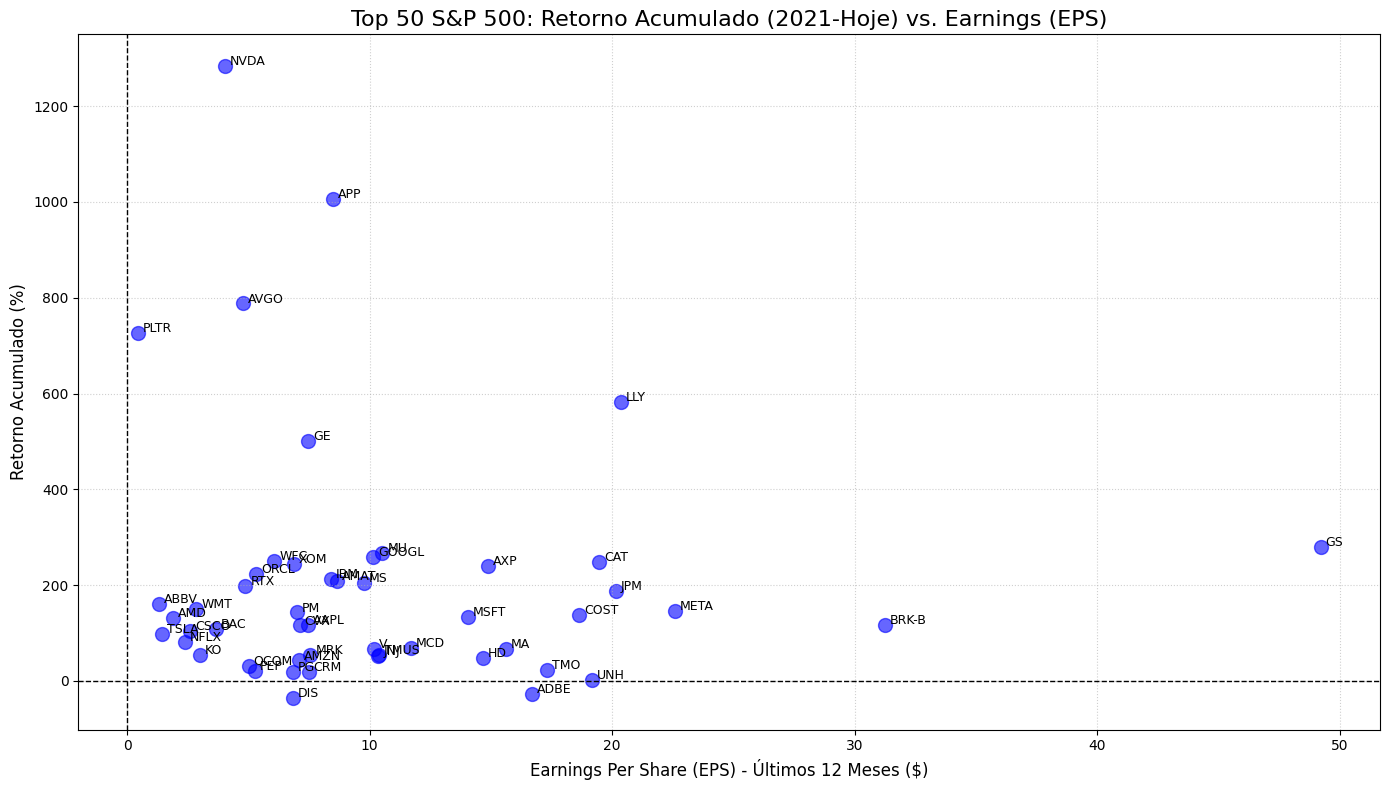

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# 1. Lista dos Top 50 Tickers (Baseada no SP500 atual)
tickers = [
    "NVDA", "AAPL", "MSFT", "AMZN", "GOOGL", "AVGO", "META", "TSLA", "BRK-B", "WMT",
    "LLY", "JPM", "V", "ORCL", "MA", "JNJ", "XOM", "PLTR", "NFLX", "BAC",
    "ABBV", "COST", "AMD", "HD", "PG", "CSCO", "UNH", "GE", "CVX", "KO",
    "CAT", "MU", "WFC", "IBM", "MS", "GS", "AXP", "MRK", "CRM", "APP",
    "RTX", "PM", "MCD", "TMUS", "TMO", "AMAT", "QCOM", "DIS", "PEP", "ADBE"
]

# Nota: O Yahoo Finance usa 'BRK-B' em vez de 'BRK.B'

data_list = []

print("Baixando dados... isso pode levar alguns segundos.")

# 2. Coleta de Dados
for ticker in tickers:
    try:
        # Instancia o objeto Ticker
        stock = yf.Ticker(ticker)
        
        # A) Calcular Retorno Acumulado desde 2021
        # Baixa histórico diário
        hist = stock.history(start="2021-01-01")
        
        if hist.empty:
            print(f"Dados não encontrados para {ticker}")
            continue
            
        price_start = hist['Close'].iloc[0] # Preço no primeiro dia de 2021
        price_end = hist['Close'].iloc[-1]  # Preço mais recente
        
        # Cálculo da variação percentual
        accumulated_return = ((price_end - price_start) / price_start) * 100
        
        # B) Obter Earnings (Lucro por Ação - TTM)
        # Tenta pegar o 'trailingEps' (EPS dos últimos 12 meses)
        eps = stock.info.get('trailingEps')
        
    
         #EPS é mais legível em escala.
        
        if eps is not None:
            data_list.append({
                'Ticker': ticker,
                'Returns_Pct': accumulated_return,
                'EPS': eps
            })
            
    except Exception as e:
        print(f"Erro ao processar {ticker}: {e}")

# Cria DataFrame
df = pd.DataFrame(data_list)

# 3. Criação do Scatterplot
plt.figure(figsize=(14, 8))

# Plota os pontos
plt.scatter(df['EPS'], df['Returns_Pct'], color='blue', alpha=0.6, s=100)

# Linhas de referência (Eixo 0)
plt.axhline(0, color='black', linewidth=1, linestyle='--')
plt.axvline(0, color='black', linewidth=1, linestyle='--')

# 4. Anotação (Colocar o nome dos tickers nos pontos)
# Usamos um loop para escrever o texto ao lado de cada ponto
for i, row in df.iterrows():
    plt.text(row['EPS'] + 0.2, row['Returns_Pct'] + 2, row['Ticker'], fontsize=9)

# Títulos e Labels
plt.title('Top 50 S&P 500: Retorno Acumulado (2021-Hoje) vs. Earnings (EPS)', fontsize=16)
plt.xlabel('Earnings Per Share (EPS) - Últimos 12 Meses ($)', fontsize=12)
plt.ylabel('Retorno Acumulado (%)', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.6)

# Ajuste para evitar cortes
plt.tight_layout()

# Exibir
plt.show()

Baixando dados das 50 empresas... aguarde um momento.


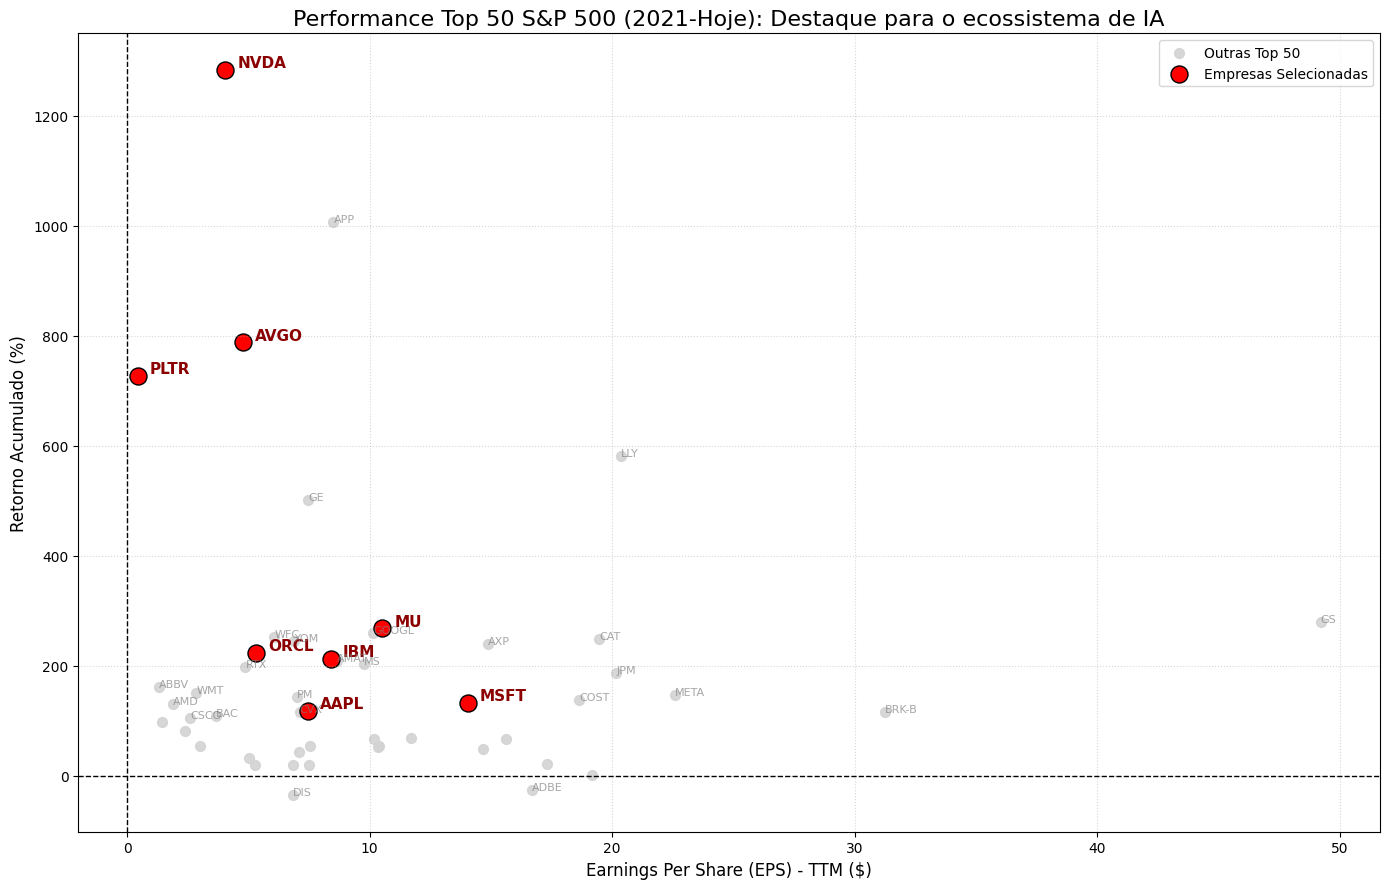

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# 1. Definição das Listas
# Lista completa das Top 50 (Contexto)
all_tickers = [
    "NVDA", "AAPL", "MSFT", "AMZN", "GOOGL", "AVGO", "META", "TSLA", "BRK-B", "WMT",
    "LLY", "JPM", "V", "ORCL", "MA", "JNJ", "XOM", "PLTR", "NFLX", "BAC",
    "ABBV", "COST", "AMD", "HD", "PG", "CSCO", "UNH", "GE", "CVX", "KO",
    "CAT", "MU", "WFC", "IBM", "MS", "GS", "AXP", "MRK", "CRM", "APP",
    "RTX", "PM", "MCD", "TMUS", "TMO", "AMAT", "QCOM", "DIS", "PEP", "ADBE"
]

# Lista de Destaque 
highlight_tickers = ["NVDA", "AAPL", "MSFT", "ORCL", "PLTR", "IBM", "AVGO",'MU']

data_list = []

print("Baixando dados das 50 empresas... aguarde um momento.")

# 2. Coleta de Dados
for ticker in all_tickers:
    try:
        stock = yf.Ticker(ticker)
        
        # Histórico desde 2021
        hist = stock.history(start="2021-01-01")
        
        if hist.empty:
            continue
            
        price_start = hist['Close'].iloc[0]
        price_end = hist['Close'].iloc[-1]
        accumulated_return = ((price_end - price_start) / price_start) * 100
        
        # EPS (Earnings Per Share)
        eps = stock.info.get('trailingEps')
        
        if eps is not None:
            # Identifica se é destaque ou não para facilitar a plotagem depois
            is_highlight = ticker in highlight_tickers
            
            data_list.append({
                'Ticker': ticker,
                'Returns_Pct': accumulated_return,
                'EPS': eps,
                'Type': 'Destaque' if is_highlight else 'Normal'
            })
            
    except Exception as e:
        print(f"Erro em {ticker}: {e}")

df = pd.DataFrame(data_list)

# 3. Configuração do Gráfico
plt.figure(figsize=(14, 9))

# Separar os dados em dois dataframes
df_normal = df[df['Type'] == 'Normal']
df_highlight = df[df['Type'] == 'Destaque']

# A) Plotar o grupo "Normal" (Fundo cinza, discreto)
plt.scatter(df_normal['EPS'], df_normal['Returns_Pct'], 
            color='lightgray', s=50, alpha=0.9, label='Outras Top 50')

# B) Plotar o grupo "Destaque" (Cor viva, maior destaque)
plt.scatter(df_highlight['EPS'], df_highlight['Returns_Pct'], 
            color='red', s=150, edgecolors='black', label='Empresas Selecionadas')

# 4. Adicionar Rótulos (Texto)
# Rótulos para os Destaques (Negrito e visível)
for i, row in df_highlight.iterrows():
    plt.text(row['EPS'] + 0.5, row['Returns_Pct'] + 5, row['Ticker'], 
             fontsize=11, fontweight='bold', color='darkred')

# (Opcional) Rótulos para as normais - apenas se quiser poluir menos, pode comentar isso
for i, row in df_normal.iterrows():
    # Só coloca nome nas normais se o retorno for muito alto para não sobrepor tudo
    if row['Returns_Pct'] > 100 or row['Returns_Pct'] < -20: 
        plt.text(row['EPS'], row['Returns_Pct'], row['Ticker'], 
                 fontsize=8, color='gray', alpha=0.7)

# Linhas de eixo zero
plt.axhline(0, color='black', linewidth=1, linestyle='--')
plt.axvline(0, color='black', linewidth=1, linestyle='--')

# Cosmética final
plt.title('Performance Top 50 S&P 500 (2021-Hoje): Destaque para o ecossistema de IA', fontsize=16)
plt.xlabel('Earnings Per Share (EPS) - TTM ($)', fontsize=12)
plt.ylabel('Retorno Acumulado (%)', fontsize=12)
plt.legend(loc='upper right')
plt.grid(True, linestyle=':', alpha=0.5)

plt.tight_layout()
plt.show()

Baixando dados em tempo real para 44 empresas...
Isso pode levar alguns segundos dependendo da sua conexão.


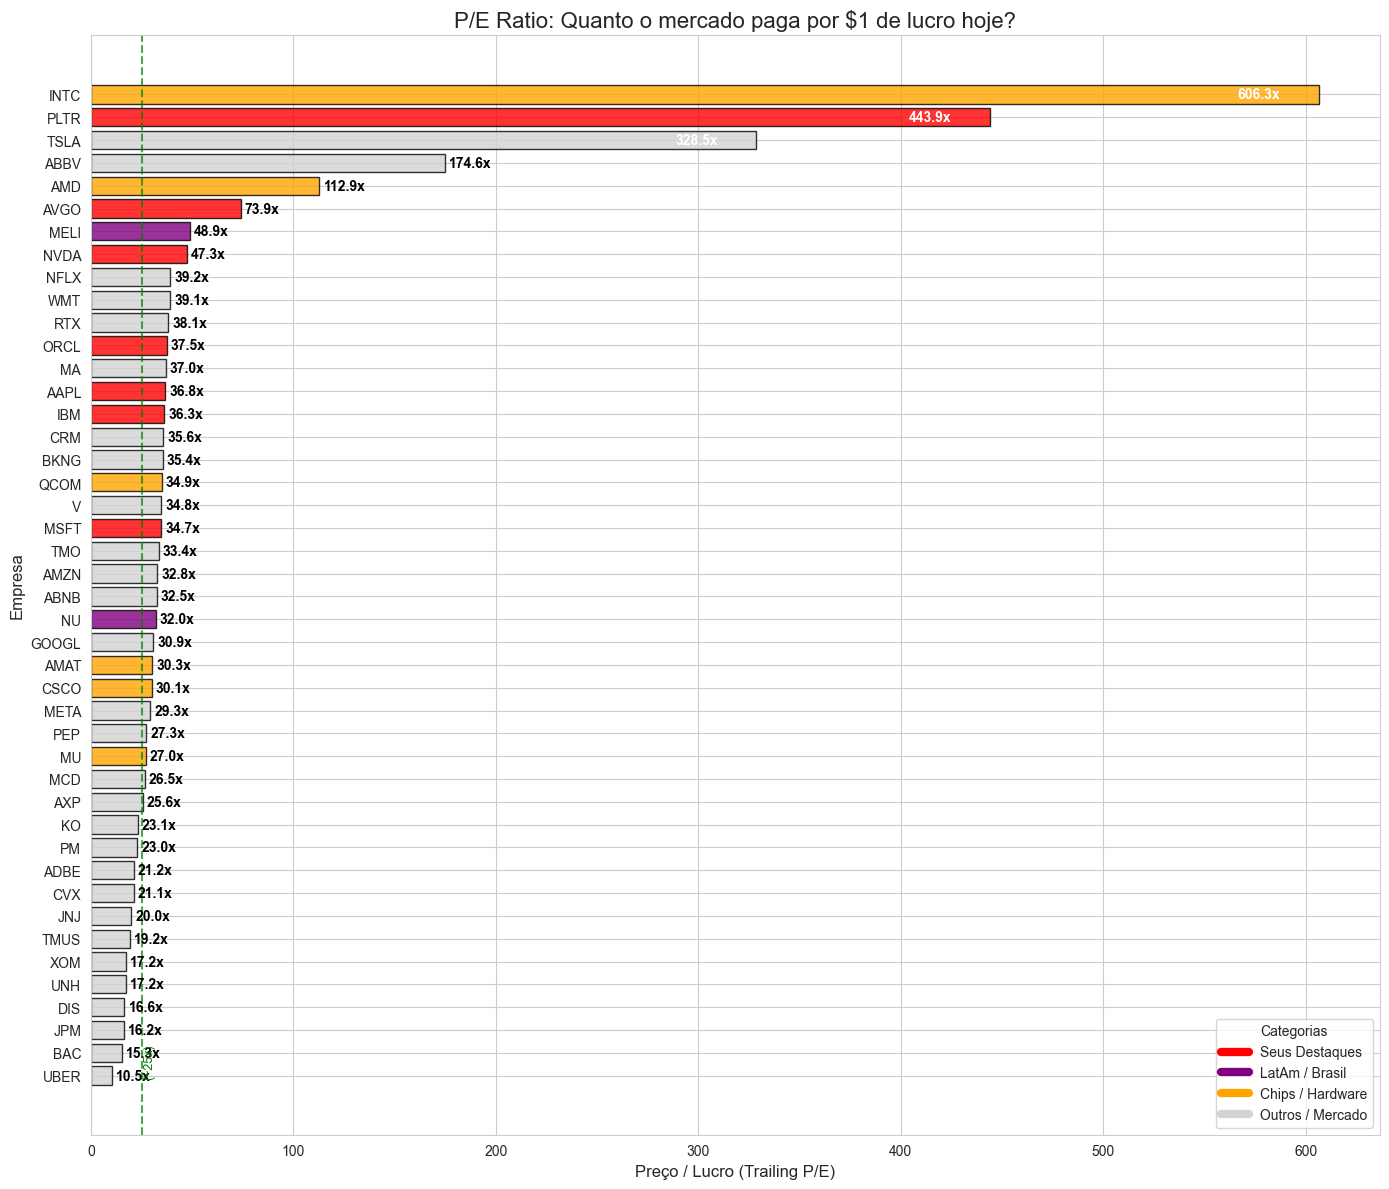


--- TOP 5 MAIORES MÚLTIPLOS---
   Ticker   PE_Ratio
14   INTC  606.33340
4    PLTR  443.90698
10   TSLA  328.48630
39   ABBV  174.63740
12    AMD  112.87309


In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Lista Expandida de Empresas (Seus destaques + Novas adições)
tickers = [
    # Seus Destaques
    "NVDA", "AAPL", "MSFT", "ORCL", "PLTR", "IBM", "AVGO",
    # Adições Relevantes (Big Tech, Semicondutores, Varejo, Finanças)
    "AMZN", "GOOGL", "META", "TSLA", "NFLX", "AMD", "QCOM", "INTC", 
    "MU", "CRM", "ADBE", "UBER", "ABNB", "BKNG", "DIS", "KO", "PEP", 
    "JPM", "V", "MA", "MELI", "NU", "WMT","AMAT","TMO","TMUS","MCD","PM","RTX","AXP", "CVX","CSCO",
    "ABBV","JNJ","XOM","BAC","UNH"
]

# Lista para destacar em Vermelho
destaques_user = ["NVDA", "AAPL", "MSFT", "ORCL", "PLTR", "IBM", "AVGO"]

print(f"Baixando dados em tempo real para {len(tickers)} empresas...")
print("Isso pode levar alguns segundos dependendo da sua conexão.")

data_list = []

# 2. Coleta de Dados ao Vivo
for t in tickers:
    try:
        stock = yf.Ticker(t)
        info = stock.info
        
        # Tentamos pegar o P/E já calculado (Trailing PE)
        pe_ratio = info.get('trailingPE')
        
        # Se não tiver P/E (ex: empresa com prejuízo recente ou dados ausentes), pulamos ou marcamos
        if pe_ratio is None:
            # Tenta calcular manualmente se tiver preço e EPS
            try:
                price = info.get('currentPrice') or info.get('regularMarketPreviousClose')
                eps = info.get('trailingEps')
                if price and eps and eps > 0:
                    pe_ratio = price / eps
                else:
                    pe_ratio = 0 # Marca como 0 para filtrar depois (sem lucro)
            except:
                pe_ratio = 0
        
        # Nome curto para o gráfico
        name = info.get('shortName', t).split()[0]
        
        # Categorização para cores
        if t in destaques_user:
            category = "Seus Destaques"
        elif t in ["MELI", "NU"]:
            category = "LatAm / Brasil"
        elif t in ["AMD", "QCOM", "MU", "INTC","AMAT", "CSCO"]:
            category = "Chips / Hardware"
        else:
            category = "Outros / Mercado"

        data_list.append({
            'Ticker': t,
            'Name': name,
            'PE_Ratio': pe_ratio,
            'Category': category
        })
        
    except Exception as e:
        print(f"Erro ao baixar {t}: {e}")

# Cria DataFrame e Limpa dados
df = pd.DataFrame(data_list)
# Remove empresas com P/E zerado (sem lucro/prejuízo) ou muito absurdo para o gráfico
df_clean = df[df['PE_Ratio'] > 0].sort_values('PE_Ratio', ascending=True)

# 3. Configuração Visual
plt.figure(figsize=(14, 12))
sns.set_style("whitegrid")

# Cores Personalizadas
palette = {
    "Seus Destaques": "red",      # Destaque máximo
    "LatAm / Brasil": "purple",   # Roxo para Nu/Meli
    "Chips / Hardware": "orange", # Laranja
    "Outros / Mercado": "lightgray" # Cinza para fundo
}

# Gráfico de Barras
bars = plt.barh(df_clean['Ticker'], df_clean['PE_Ratio'], 
                color=[palette[c] for c in df_clean['Category']], 
                edgecolor='black', alpha=0.8)

# 4. Anotações (Valores nas barras)
for bar in bars:
    width = bar.get_width()
    # Lógica para o texto não ficar cortado se a barra for muito longa
    label_x_pos = width + 2 if width < 300 else width - 40
    color_text = 'black' if width < 300 else 'white'
    
    plt.text(label_x_pos, bar.get_y() + bar.get_height()/2, 
             f'{width:.1f}x', 
             va='center', fontweight='bold', fontsize=10, color=color_text)

# Linhas e Títulos
plt.axvline(25, color='green', linestyle='--', alpha=0.7)
plt.text(26, 0, '(~25x)', color='green', fontsize=9, rotation=90)

plt.title('P/E Ratio: Quanto o mercado paga por $1 de lucro hoje?', fontsize=16)
plt.xlabel('Preço / Lucro (Trailing P/E)', fontsize=12)
plt.ylabel('Empresa', fontsize=12)

# Cria legenda manual
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=palette[k], lw=6) for k in palette]
plt.legend(custom_lines, palette.keys(), title="Categorias", loc="lower right")

plt.tight_layout()
plt.show()

# Exibe tabela rápida dos Top 5 mais caros
print("\n--- TOP 5 MAIORES MÚLTIPLOS---")
print(df_clean[['Ticker', 'PE_Ratio']].tail(5).sort_values('PE_Ratio', ascending=False))

C:\Users\guilh\AppData\Local\Temp\ipykernel_29888\665694271.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], data=df, x="Empresa", y="Net Income ($B)", palette=colors_cap)
C:\Users\guilh\AppData\Local\Temp\ipykernel_29888\665694271.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], data=df, x="Empresa", y="P/E Ratio", palette=colors_pe)


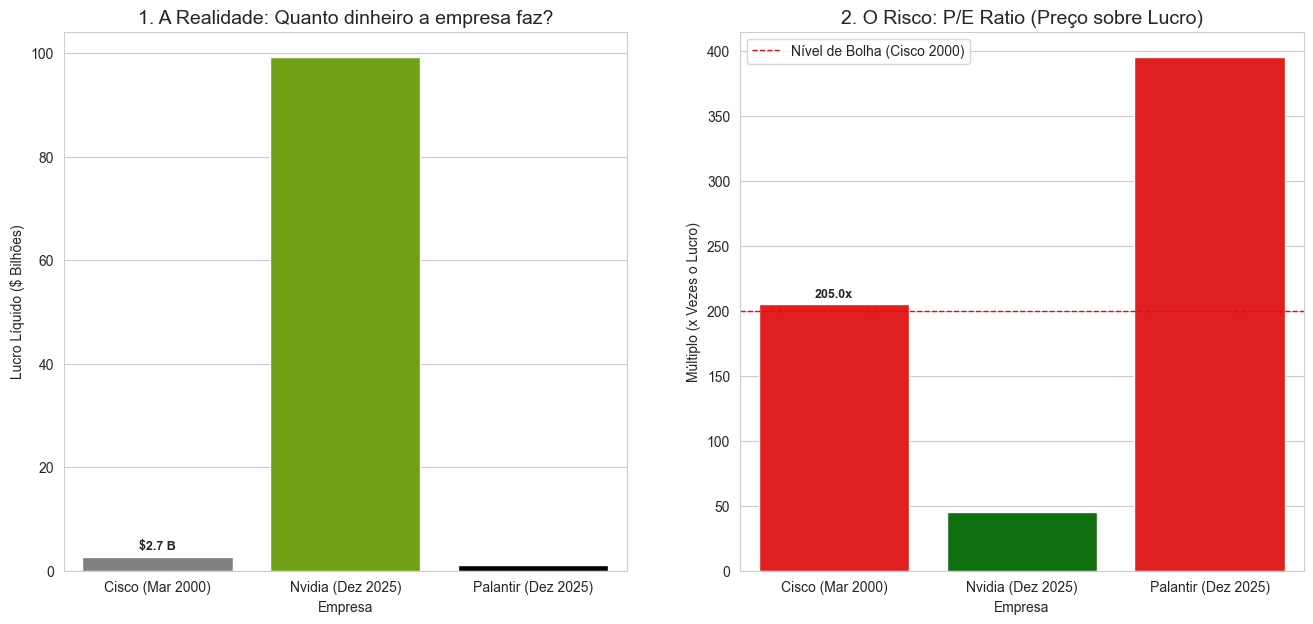

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Dados Históricos e Atuais
# Fontes: Relatórios Anuais da Cisco (2000) e Dados de Mercado Atuais (2025)
data = [
    {
        "Empresa": "Cisco (Mar 2000)", 
        "Cenário": "Bolha .com",
        "Market Cap ($B)": 555,   # Valor de Mercado no pico
        "Net Income ($B)": 2.7,   # Lucro Líquido Anual na época
        "P/E Ratio": 205.0        # Preço/Lucro no pico (>200x)
                                  #Não ajustei pela inflação esses valores, pois o que importa não é a comparação entre empresas, mas sim a relação market cap,PL e lucro liquido.
    },
    {
        "Empresa": "Nvidia (Dez 2025)", 
        "Cenário": "AI Boom",
        "Market Cap ($B)": 4500,  # ~$4.5 Trilhões
        "Net Income ($B)": 99.2,  # Lucro TTM 
        "P/E Ratio": 45.5         # Múltiplo atual (~45x)
    },
    {
        "Empresa": "Palantir (Dez 2025)", 
        "Cenário": "AI Boom",
        "Market Cap ($B)": 432,   # ~$430 Bilhões
        "Net Income ($B)": 1.1,   # Lucro TTM 
        "P/E Ratio": 395.0        # Múltiplo atual (~400x)
    }
]

df = pd.DataFrame(data)

# Configuração Visual: Criando 2 gráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
sns.set_style("whitegrid")

# Cores para destacar perigo
colors_pe = ["red" if x > 100 else "green" for x in df["P/E Ratio"]]
colors_cap = {"Cisco (Mar 2000)": "gray", "Nvidia (Dez 2025)": "#76b900", "Palantir (Dez 2025)": "black"}

# GRÁFICO 1: A Realidade (Lucro Líquido)
sns.barplot(ax=axes[0], data=df, x="Empresa", y="Net Income ($B)", palette=colors_cap)
axes[0].set_title("1. A Realidade: Quanto dinheiro a empresa faz?", fontsize=14)
axes[0].set_ylabel("Lucro Líquido ($ Bilhões)")
axes[0].bar_label(axes[0].containers[0], fmt='$%.1f B', padding=3, fontweight='bold', fontsize=9)

# GRÁFICO 2: A Expectativa (P/E Ratio)
sns.barplot(ax=axes[1], data=df, x="Empresa", y="P/E Ratio", palette=colors_pe)
axes[1].set_title("2. O Risco: P/E Ratio (Preço sobre Lucro)", fontsize=14)
axes[1].set_ylabel("Múltiplo (x Vezes o Lucro)")
axes[1].axhline(200, color='red', linestyle='--', linewidth=1, label="Nível de Bolha (Cisco 2000)")
axes[1].legend()
axes[1].bar_label(axes[1].containers[0], fmt='%.1fx', padding=3, fontweight='bold', fontsize=9)



plt.show()

In [ ]:
import yfinance as yf
import pandas as pd

# Definição do universo de ativos (IA) e inicialização da estrutura de dados
tickers_ia = ["NVDA","AAPL","MSFT","ORCL","PLTR","IBM","AVGO"]
results = []

# Iteração para extração de dados de derivativos via API yfinance
for t in tickers_ia:
    print(f"Processando {t}...")
    tk = yf.Ticker(t)
    
    # Mapeamento de vencimentos e seleção do 'front month' 
    expirations = tk.options
    if not expirations:
        print(f"Sem opções para {t}")
        continue
    
    expiry = expirations[0] # Seleção do vencimento mais próximo para análise tática
    
    # Download da cadeia de opções (Option Chain) para Calls e Puts
    opt_chain = tk.option_chain(expiry)
    calls = opt_chain.calls
    puts = opt_chain.puts
    
    # Agregação do Open Interest (OI) para mensurar o posicionamento total do mercado
    call_oi = calls["openInterest"].sum()
    put_oi = puts["openInterest"].sum()
    
    # Cálculo do Put/Call Ratio (PCR) como indicador de viés direcional 
    pcr = put_oi / call_oi if call_oi > 0 else None
    
    # Armazenamento dos dados estruturados para processamento po
    results.append({
        "Ticker": t,
        "Expiry": expiry,
        "Call_OI": call_oi,
        "Put_OI": put_oi,
        "Put_Call_Ratio": pcr
    })

# Consolidação em DataFrame para análise quantitativa e visualização
df_pcr = pd.DataFrame(results)
df_pcr

Processando NVDA...
Processando AAPL...
Processando MSFT...
Processando ORCL...
Processando PLTR...
Processando IBM...
Processando AVGO...


,Ticker,Expiry,Call_OI,Put_OI,Put_Call_Ratio
0,NVDA,2026-01-02,470128,208967,0.444490
1,AAPL,2026-01-02,96343,46385,0.481457
2,MSFT,2026-01-02,39998,29481,0.737062
3,ORCL,2026-01-02,53956,50434,0.934725
4,PLTR,2026-01-02,146303,63490,0.433962
5,IBM,2026-01-02,3692,4431,1.200163
6,AVGO,2026-01-02,76467,49205,0.643480


Processando NVDA...
Processando AAPL...
Processando MSFT...
Processando ORCL...
Processando PLTR...
Processando IBM...
Processando AVGO...


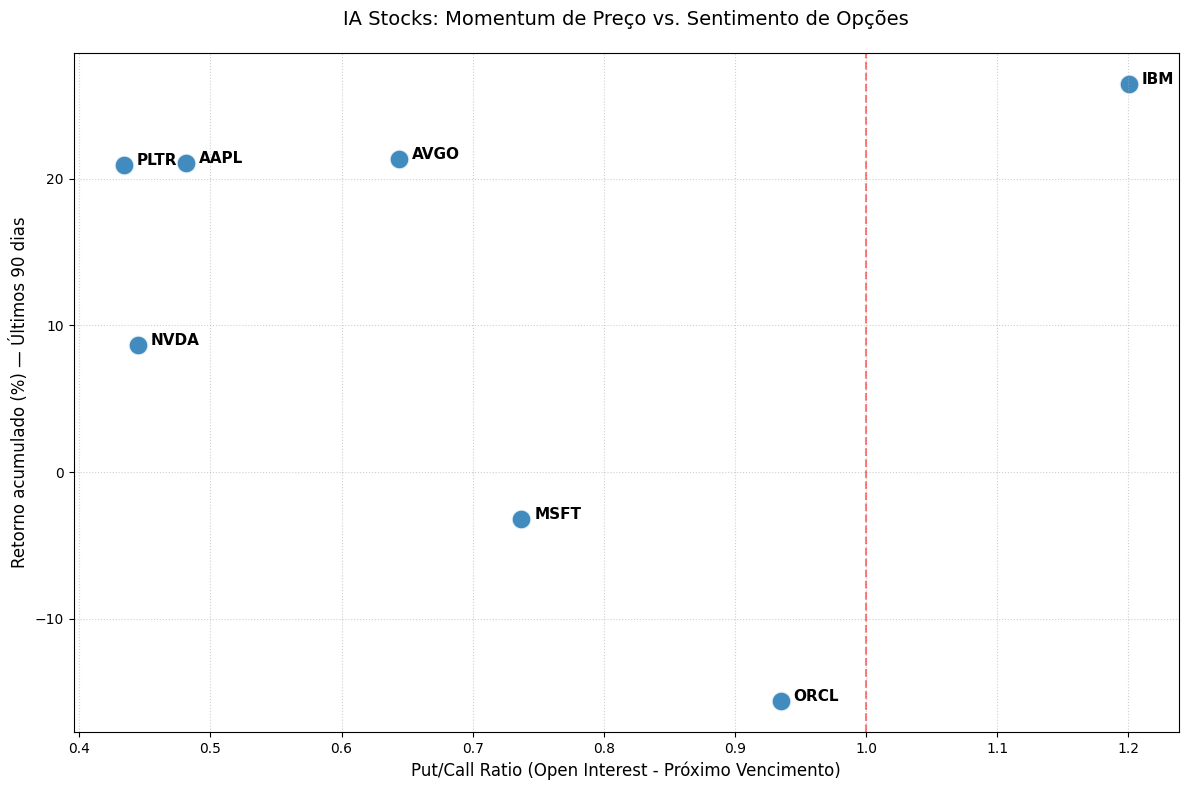

  Ticker  Retorno_90d   PCRatio Option_Expiry
0   NVDA     0.086382  0.444490    2026-01-02
1   AAPL     0.210854  0.481457    2026-01-02
2   MSFT    -0.032219  0.737062    2026-01-02
3   ORCL    -0.156243  0.934725    2026-01-02
4   PLTR     0.209602  0.433962    2026-01-02
5    IBM     0.264779  1.200163    2026-01-02
6   AVGO     0.213752  0.643480    2026-01-02


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Seleção do universo de ativos (IA) e definição da janela de 90 dias para análise de momentum.
tickers_ia = ["NVDA", "AAPL", "MSFT", "ORCL", "PLTR", "IBM", "AVGO"]
window_days = 90  

def get_close_series(ticker):
    # Otimização de performance
    df = yf.download(ticker, period="1y", auto_adjust=True, progress=False)
    if df.empty:
        return pd.Series(dtype=float)
    
    if isinstance(df.columns, pd.MultiIndex):
        close_col = [c for c in df.columns if 'Close' in c[0]]
        return df[close_col[0]].dropna()
    
    return df["Close"].dropna()

rows = []
#Processando os derivativos(opções)
for t in tickers_ia:
    print(f"Processando {t}...")
    
    # Extração de preços e cálculo do Retorno Geométrico acumulado.
    prices = get_close_series(t)
    if len(prices) < window_days + 5:
        print(f"Série curta demais para {t}")
        continue

    price_today = prices.iloc[-1]
    price_90d = prices.iloc[-window_days]
    ret_90d = (price_today / price_90d) - 1

    # Extração de dados do mercado de opções para análise de sentimento.
    tk = yf.Ticker(t)
    expirations = tk.options
    if not expirations:
        continue

    # Seleção do vencimento mais próximo para capturar o viés.
    expiry = expirations[0]  
    chain = tk.option_chain(expiry)

    # Agregação do Open Interest (OI) para mensurar o posicionamento total.
    call_oi = chain.calls["openInterest"].sum()
    put_oi = chain.puts["openInterest"].sum()

    # Cálculo do Put/Call Ratio (PCR): Razão entre proteção (Puts) e otimismo (Calls).
    pcr = put_oi / call_oi if (call_oi and call_oi > 0) else np.nan

    rows.append({
        "Ticker": t,
        "Retorno_90d": ret_90d,
        "PCRatio": pcr,
        "Option_Expiry": expiry
    })

# Consolidação dos dados para análise quantitativa.
df_90d = pd.DataFrame(rows).dropna()

plt.figure(figsize=(12, 8))

# Geração do scatterplot para correlacionar momentum de preço e sentimento de opções.
plt.scatter(
    df_90d["PCRatio"],
    df_90d["Retorno_90d"] * 100,
    s=200,
    color="#1f77b4",
    edgecolors="white",
    linewidth=1.5,
    alpha=0.85
)

#  dentificação de outliers e anomalias.
for _, row in df_90d.iterrows():
    plt.text(
        row["PCRatio"] + 0.01,
        row["Retorno_90d"] * 100,
        row["Ticker"],
        fontsize=11,
        fontweight='bold'
    )

# Linha de neutralidade (PCR = 1.0): Fronteira entre viés otimista e defensivo.
plt.axvline(1, color="red", linestyle="--", alpha=0.5, label="Neutro (PCR=1)")
# Plot do gráfico
plt.xlabel("Put/Call Ratio (Open Interest - Próximo Vencimento)", fontsize=12)
plt.ylabel("Retorno acumulado (%) — Últimos 90 dias", fontsize=12)
plt.title("IA Stocks: Momentum de Preço vs. Sentimento de Opções", fontsize=14, pad=20)

plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()

print(df_90d)

Processando NVDA...
Processando AAPL...
Processando MSFT...
Processando ORCL...
Processando PLTR...
Processando IBM...
Processando AVGO...


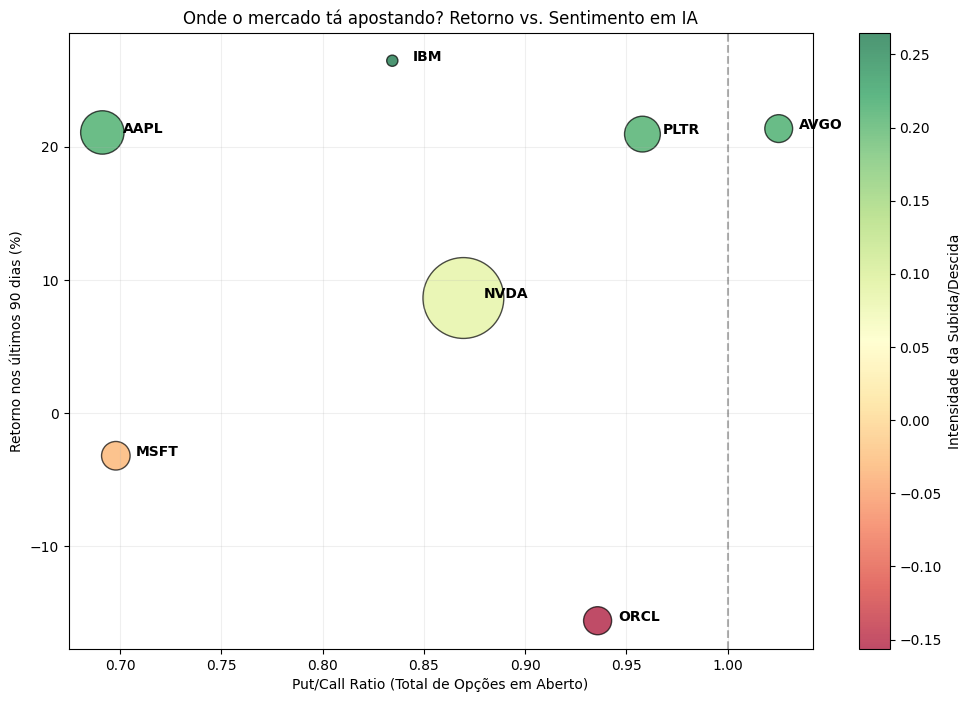

  Ticker  Retorno_90d  Full_PCR    Total_OI
1   AAPL     0.210854  0.691145   4886658.0
2   MSFT    -0.032219  0.697804   2114286.0
5    IBM     0.264779  0.834373    326544.0
0   NVDA     0.086382  0.869496  16940230.0
3   ORCL    -0.156243  0.935789   2040138.0
4   PLTR     0.209602  0.957940   3324648.0
6   AVGO     0.213752  1.025254   2010249.0


In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Lista das ações de IA vamos analisar e o prazo de 3 meses (90 dias).
tickers_ia = ["NVDA", "AAPL", "MSFT", "ORCL", "PLTR", "IBM", "AVGO"]
window_days = 90 

def get_close_series(ticker):
    # Puxa os preços de 1 ano pra trás pra garantir que tem dado suficiente.
    # O auto_adjust e o dropna ajudam a não vir dado sujo da API.
    df = yf.download(ticker, period="1y", auto_adjust=True, progress=False)
    if df.empty: return pd.Series(dtype=float)
    if isinstance(df.columns, pd.MultiIndex):
        close_col = [c for c in df.columns if 'Close' in c[0]]
        return df[close_col[0]].dropna()
    return df["Close"].dropna()

rows = []

#  Loop pra processar cada ticker 
for t in tickers_ia:
    print(f"Processando {t}...")
    
    # 1. Calculando o retorno pra ver quanto a ação rendeu no trimestre.
    prices = get_close_series(t)
    if len(prices) < window_days: continue
    ret_90d = (prices.iloc[-1] / prices.iloc[-window_days]) - 1

    # 2. Parte das opções:  somando tudo
    tk = yf.Ticker(t)
    expirations = tk.options
    
    total_call_oi = 0
    total_put_oi = 0
    
    # Varrendo todos os vencimentos disponíveis pra pegar o volume total.
    for expiry in expirations:
        try:
            chain = tk.option_chain(expiry)
            total_call_oi += chain.calls["openInterest"].sum()
            total_put_oi += chain.puts["openInterest"].sum()
        except:
            continue # Se algum vencimento der erro, pula pro próximo

    # 3. Calculando o PCR Real Oficial (soma total de Puts / Calls).
    full_pcr = total_put_oi / total_call_oi if total_call_oi > 0 else np.nan

    rows.append({
        "Ticker": t,
        "Retorno_90d": ret_90d,
        "Full_PCR": full_pcr,
        "Total_OI": total_call_oi + total_put_oi
    })

# Montando o DataFrame final pra plotar
df_final = pd.DataFrame(rows).dropna()

# gráfico 
plt.figure(figsize=(12, 8))

# bolha maior = mais gente operando (volume de Open Interest).
# A cor muda conforme o retorno (Verde pra cima, Vermelho pra baixo).
scatter = plt.scatter(
    df_final["Full_PCR"],
    df_final["Retorno_90d"] * 100,
    s=df_final["Total_OI"] / 5000, 
    c=df_final["Retorno_90d"], 
    cmap="RdYlGn",
    edgecolors="k",
    alpha=0.7
)

# Colocando o nome de cada ação pra facilitar a leitura.
for _, row in df_final.iterrows():
    plt.text(row["Full_PCR"] + 0.01, row["Retorno_90d"] * 100, row["Ticker"], fontweight='bold')

# Linha do PCR = 1 pra separar os otimistas dos receosos
plt.axvline(1, color="black", linestyle="--", alpha=0.3)
plt.xlabel("Put/Call Ratio (Total de Opções em Aberto)")
plt.ylabel("Retorno nos últimos 90 dias (%)")
plt.title("Onde o mercado tá apostando? Retorno vs. Sentimento em IA")
plt.colorbar(scatter, label="Intensidade da Subida/Descida")
plt.grid(alpha=0.2)
plt.show()

# Printando a tabela ordenada
print(df_final.sort_values(by="Full_PCR"))

Buscando dados de NVDA...
Buscando dados de AAPL...
Buscando dados de MSFT...
Buscando dados de ORCL...
Buscando dados de PLTR...
Buscando dados de IBM...
Buscando dados de AVGO...


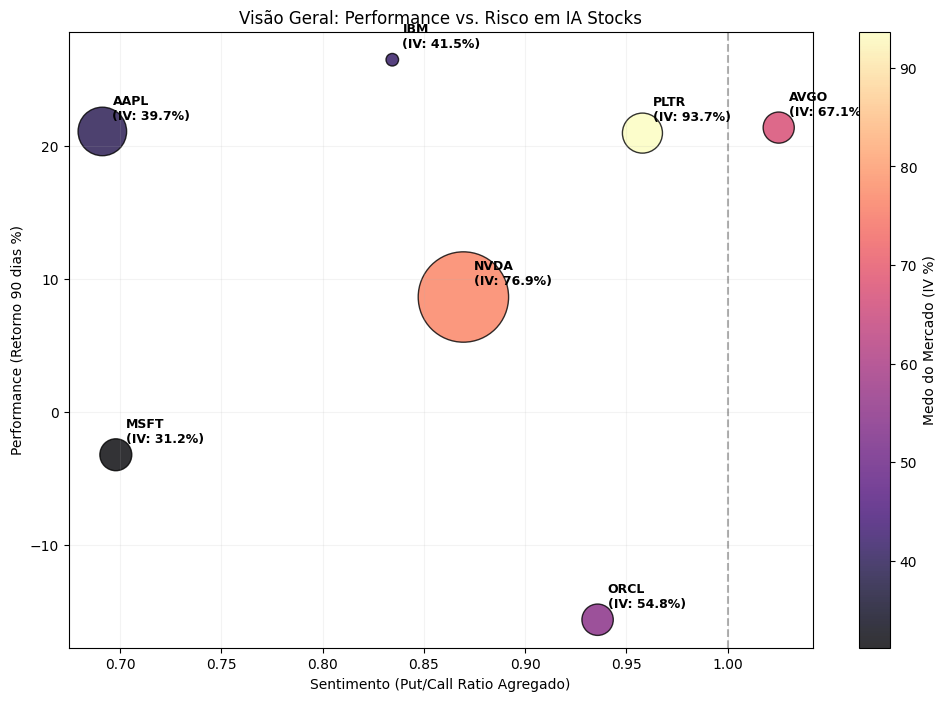

  Ticker  Retorno_90d  Full_PCR    Avg_IV    Total_OI
4   PLTR     0.209602  0.957940  0.936692   3324648.0
0   NVDA     0.086382  0.869496  0.768891  16940230.0
6   AVGO     0.213752  1.025254  0.670944   2010249.0
3   ORCL    -0.156243  0.935789  0.547516   2040138.0
5    IBM     0.264779  0.834373  0.415114    326544.0
1   AAPL     0.210854  0.691145  0.396721   4886658.0
2   MSFT    -0.032219  0.697804  0.311637   2114286.0


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# os ativos e a janela de dias.
tickers_ia = ["NVDA", "AAPL", "MSFT", "ORCL", "PLTR", "IBM", "AVGO"]
window_days = 90 

def get_close_series(ticker):
    # Puxa os preços do último ano. O 'auto_adjust' limpa dividendos e splits pra não sujar o gráfico.
    df = yf.download(ticker, period="1y", auto_adjust=True, progress=False)
    if df.empty: return pd.Series(dtype=float)
    if isinstance(df.columns, pd.MultiIndex):
        close_col = [c for c in df.columns if 'Close' in c[0]]
        return df[close_col[0]].dropna()
    return df["Close"].dropna()

rows = []

# -
for t in tickers_ia:
    print(f"Buscando dados de {t}...")
    
    # 1. Performance: quanto a ação subiu ou caiu nos últimos 90 dias.
    prices = get_close_series(t)
    if len(prices) < window_days: continue
    ret_90d = (prices.iloc[-1] / prices.iloc[-window_days]) - 1

    # 2. Opções:posicionamento em todos os vencimentos.
    tk = yf.Ticker(t)
    expirations = tk.options
    
    total_call_oi, total_put_oi, iv_weighted_sum, total_oi_for_iv = 0, 0, 0, 0
    
    # Passando por cada data de vencimento pra somar o volume e calcular o risco.
    for expiry in expirations:
        try:
            chain = tk.option_chain(expiry)
            calls = chain.calls.dropna(subset=['openInterest', 'impliedVolatility'])
            puts = chain.puts.dropna(subset=['openInterest', 'impliedVolatility'])
            
            # Somando o Open Interest (OI) - contratos abertos
            total_call_oi += calls["openInterest"].sum()
            total_put_oi += puts["openInterest"].sum()
            
            # Cálculo da IV ponderada: dá mais peso pra onde o smartmoney está.
            iv_weighted_sum += (calls['impliedVolatility'] * calls['openInterest']).sum()
            iv_weighted_sum += (puts['impliedVolatility'] * puts['openInterest']).sum()
            total_oi_for_iv += (calls['openInterest'].sum() + puts['openInterest'].sum())
        except:
            continue

    # 3. Consolidação: Gera o PCR (Put/Call Ratio) e a IV média.
    full_pcr = total_put_oi / total_call_oi if total_call_oi > 0 else np.nan
    avg_iv = (iv_weighted_sum / total_oi_for_iv) if total_oi_for_iv > 0 else np.nan

    rows.append({
        "Ticker": t, "Retorno_90d": ret_90d, "Full_PCR": full_pcr,
        "Avg_IV": avg_iv, "Total_OI": total_oi_for_iv
    })

df_final = pd.DataFrame(rows).dropna()
plt.figure(figsize=(12, 8))

# Criando as bolhas: o tamanho mostra a liquidez (OI) e a cor mostra a IV (o "medo").
scatter = plt.scatter(
    df_final["Full_PCR"], df_final["Retorno_90d"] * 100,
    s=df_final["Total_OI"] / 4000, c=df_final["Avg_IV"] * 100, 
    cmap="magma", edgecolors="black", alpha=0.8
)

# Colocando os nomes das empresas no gráfico.
for _, row in df_final.iterrows():
    plt.text(row["Full_PCR"] + 0.005, row["Retorno_90d"] * 100 + 0.7, 
             f"{row['Ticker']}\n(IV: {row['Avg_IV']*100:.1f}%)", 
             fontsize=9, fontweight='bold', va='bottom')

# Linha do PCR = 1 (divisória entre otimismo e proteção).
plt.axvline(1, color="black", linestyle="--", alpha=0.3)
plt.xlabel("Sentimento (Put/Call Ratio Agregado)")
plt.ylabel("Performance (Retorno 90 dias %)")
plt.title("Visão Geral: Performance vs. Risco em IA Stocks")
plt.colorbar(scatter).set_label("Medo do Mercado (IV %)")
plt.grid(alpha=0.15)
plt.show()

# Resumo rápido pra análise rápida no console.
print(df_final.sort_values(by="Avg_IV", ascending=False))

#Este gráfico cruza performance passada (Eixo Y) com a expectativa de risco futuro (Eixo X).
# A cor representa a Volatilidade Implícita (IV) - o "preço do medo".
#
# ANÁLISE DOS ATIVOS:
#
# 1. NVDA (O Eixo de Equilíbrio): 
#    Aparece centralizada, com o maior volume de dados.
#    Com retorno 9% e PCR 0.86, indica um cenário institucional maduro e equilibrado.
#    
#
# 2. PLTR & AVGO (Sinal de Alerta):
#    Apresentam retornos altos (>20%), mas o PCR está colado em 1.0.
#    Interpretação: O mercado está subindo, mas os investidores estão comprando proteção 
#    (Puts) de forma agressiva. Indica um rali "esticado" e risco de reversão brusca.
#
# 3. ORCL (Anomalia de Fraqueza):
#    Apresenta um comportamento divergente: retorno negativo com PCR alto (~0.90).
#    Diferente de uma correção saudável, o mercado de opções está confirmando a queda,
#    sinalizando baixa convicção em uma recuperação de curto prazo.
#
# 4. AAPL & MSFT (Otimismo e Complacência):
#    PCRs baixos (0.70) indicam que o mercado não está cobrando caro para proteger estes ativos.
#    Na AAPL, o sentimento é de otimismo puro. Na MSFT, sugere uma postura de "buy the dip".
#
# CONCLUSÃO PRELIMINAR: Ativos com PCR > 0.95 e Retorno > 20% (PLTR/AVGO) sugerem que o prêmio 
# de risco de cauda (tail risk) está ficando caro, indicando possível topo de mercado.